# Clustering in Python üêç

This notebook introduces basic clustering algorithm in Python using Scikit-learn module. At first, we have to import necessary libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [5]:
# disabble the warnings 
import warnings
warnings.filterwarnings("ignore")


The first step is to generate data needed for the presentation. Specify number of clusters to be generated by specifying `no_clusters` variable.

In [6]:
no_clusters = 5
X, Y = make_blobs(n_samples=200, centers=no_clusters,
                  n_features=2, random_state=0)

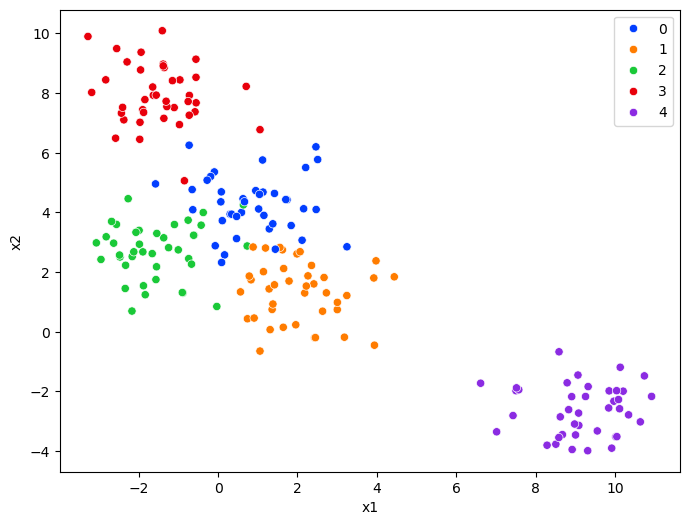

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y, palette='bright')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## K-means clustering training

In the code below, we train k-means clustering model using scikit-learn library. We do it for several different numbers of clusters, to find optimum numbers of center points that minimize the inertia of the model.

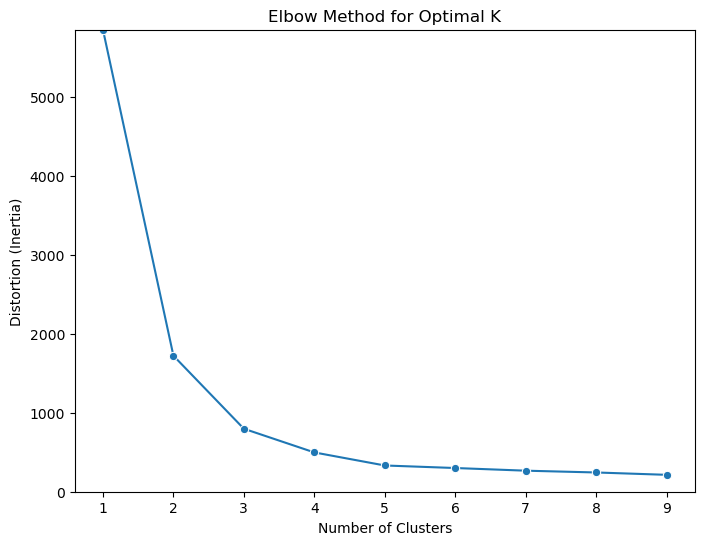

In [8]:
cluster_range = range(1, no_clusters * 2)
distortions = []
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
sns.lineplot(x=cluster_range, y=distortions, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion (Inertia)')
plt.ylim(0, max(distortions))
plt.xticks(range(1, max(cluster_range) + 1))
plt.show();

## Cluster visualization

You can select the value of `optimal_k` to see the clustering graph. You can select any integer value here.

### Plotting blobs for different numbers of centers

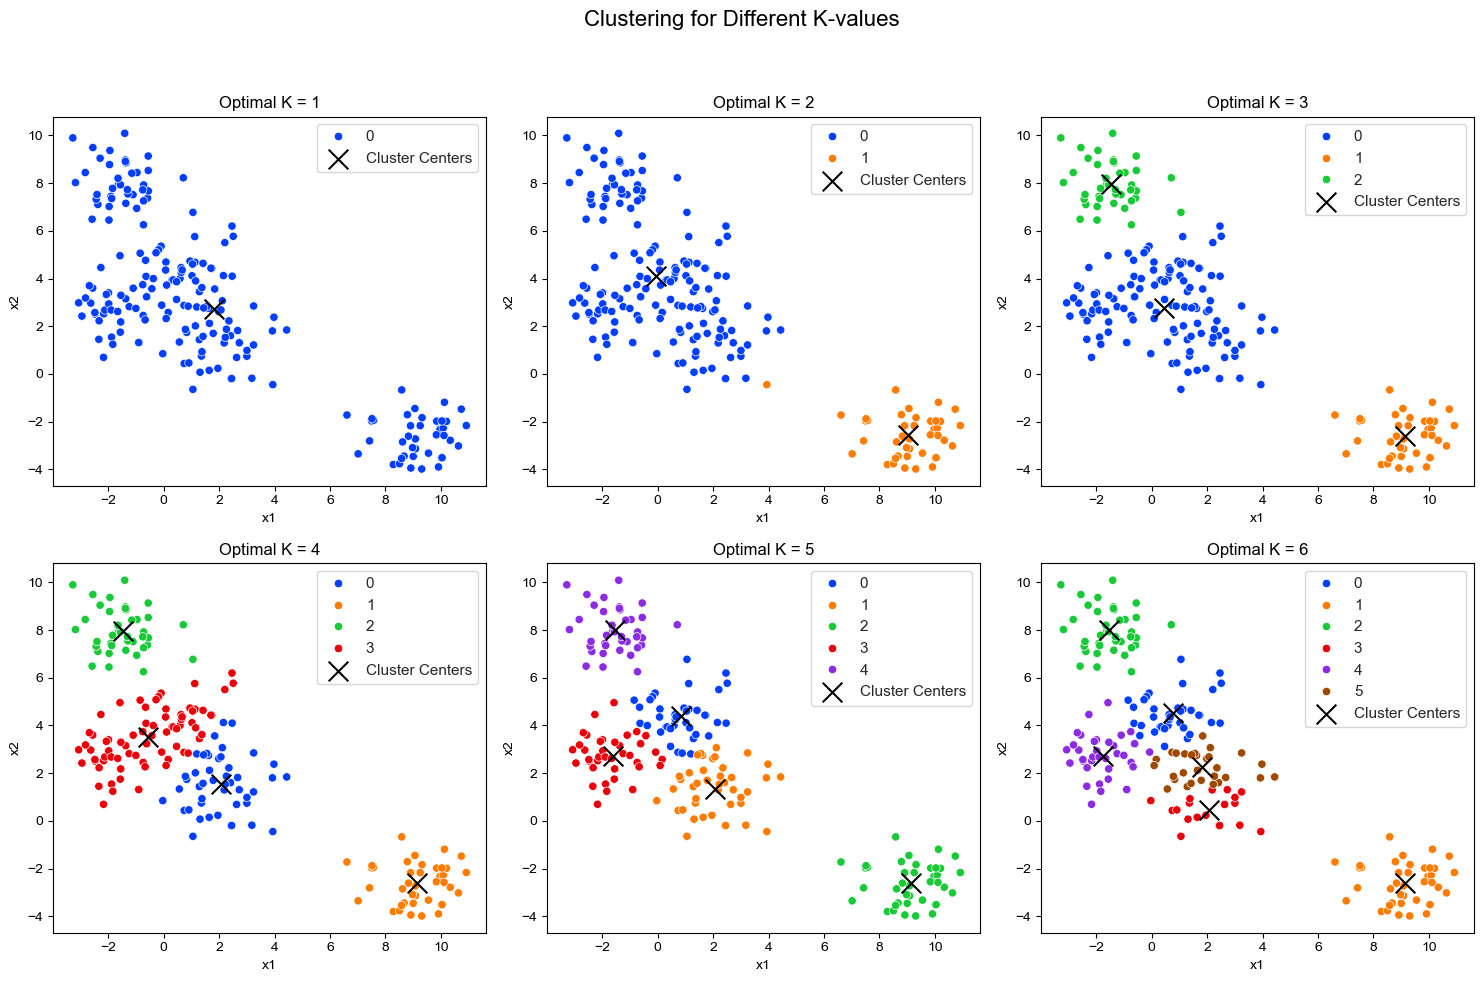

In [9]:
k_values = [i for i in range(1,no_clusters + 2)]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Clustering for Different K-values', fontsize=16)

for i, k in enumerate(k_values):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    ax = axes[i // 3, i % 3]
    sns.set(style='whitegrid')
    scatterplot = sns.scatterplot(x=X[:,0], y=X[:,1],
                                  hue=kmeans.labels_, palette='bright',
                                  legend='full', ax=ax)
    ax.set_title(f'Optimal K = {k}')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    cluster_centers = kmeans.cluster_centers_
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
               s=200, c='black', marker='x', label='Cluster Centers')
    ax.legend()
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show();

In [10]:
optimal_k = 5

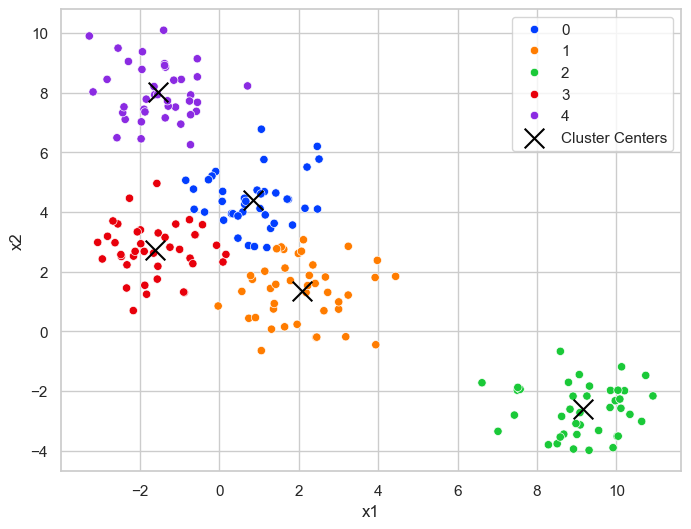

In [11]:
kmeans = KMeans(n_clusters=optimal_k, random_state=0, n_init=10)
kmeans.fit(X)
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
scatterplot = sns.scatterplot(
    x=X[:,0], y=X[:,1],
    hue=kmeans.labels_,
    palette='bright',
    legend='full'
)
plt.xlabel('x1')
plt.ylabel('x2')
cluster_centers = kmeans.cluster_centers_
plt.scatter(
    cluster_centers[:, 0],
    cluster_centers[:, 1],
    s=200,
    c='black',
    marker='x',
    label='Cluster Centers'
)
plt.legend()
plt.show();

In [12]:
# Predict the cluster for each data point
Y_pred = kmeans.predict(X)
# Add the cluster to the dataset
df = pd.DataFrame(X, columns=['x1', 'x2'])
df['cluster'] = Y_pred
df['true_label'] = Y
print(df.sample(10))



           x1        x2  cluster  true_label
42   0.465465  3.123155        0           0
112  6.614083 -1.724850        2           4
48   2.221941  1.532695        1           1
151 -1.358796  8.855633        4           3
100 -0.637628  4.091047        0           0
8    0.732405  2.875625        0           2
129 -2.950965  2.424562        3           2
38   1.620114  2.746927        1           1
74  -0.730000  6.254563        4           0
37  -1.973853  6.452096        4           3


In [14]:
# Print the cluster centers
print('Cluster Centers:')
for i, center in enumerate(kmeans.cluster_centers_):
    print(f'Cluster {i}: {center}')


Cluster Centers:
Cluster 0: [1.80176719 2.72425945]


In [15]:

# Print the cluster sizes
print('\nCluster Sizes:')
cluster_sizes = df['cluster'].value_counts()
for cluster, size in cluster_sizes.items():
    print(f'Cluster {cluster}: {size} points')



Cluster Sizes:
Cluster 1: 42 points
Cluster 3: 40 points
Cluster 2: 40 points
Cluster 4: 39 points
Cluster 0: 39 points


In [16]:

# Print the cluster labels
print('\nCluster Labels:')
for cluster in df['cluster'].unique():
    labels = df[df['cluster'] == cluster]['true_label']
    label = labels.value_counts().idxmax()
    print(f'Cluster {cluster}: {label}')



Cluster Labels:
Cluster 1: 1
Cluster 4: 3
Cluster 0: 0
Cluster 3: 2
Cluster 2: 4


In [23]:

# Print the cluster purity
print('\nCluster Purity:')
purity = 0
for cluster in df['cluster'].unique():
    labels = df[df['cluster'] == cluster]['true_label']
    label = labels.value_counts().idxmax()
    purity += labels[labels == label].count()

purity /= len(df)
print(f'Purity: {purity:.2f}')


# Print the cluster accuracy
print('\nCluster Accuracy:')
accuracy = 0
for cluster in df['cluster'].unique():
    labels = df[df['cluster'] == cluster]['true_label']
    label = labels.value_counts().idxmax()
    accuracy += (labels == label).sum()

accuracy /= len(df)
print(f'Accuracy: {accuracy:.2f}')


# Print the cluster precision
print('\nCluster Precision:')
precision = 0
for cluster in df['cluster'].unique():
    labels = df[df['cluster'] == cluster]['true_label']
    label = labels.value_counts().idxmax()
    precision += (labels == label).sum() / len(labels)

precision /= len(df['cluster'].unique())
print(f'Precision: {precision:.2f}')


# Print the cluster recall
print('\nCluster Recall:')
recall = 0
for cluster in df['cluster'].unique():
    labels = df[df['cluster'] == cluster]['true_label']
    label = labels.value_counts().idxmax()
    recall += (labels == label).sum() / df['true_label'].value_counts()[label]

recall /= len(df['cluster'].unique())
print(f'Recall: {recall:.2f}')


# Print the cluster F1 score
print('\nCluster F1 Score:')
f1 = 2 * (precision * recall) / (precision + recall)
print(f'F1 Score: {f1:.2f}')



Cluster Purity:
Purity: 0.92

Cluster Accuracy:
Accuracy: 0.92

Cluster Precision:
Precision: 0.92

Cluster Recall:
Recall: 0.92

Cluster F1 Score:
F1 Score: 0.92


In [24]:

# Print the cluster NMI
from sklearn.metrics import normalized_mutual_info_score
nmi = normalized_mutual_info_score(df['true_label'], df['cluster'])
print(f'NMI: {nmi:.2f}')

# Print the cluster ARI
from sklearn.metrics import adjusted_rand_score
ari = adjusted_rand_score(df['true_label'], df['cluster'])
print(f'ARI: {ari:.2f}')

# Print the cluster silhouette score
from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X, df['cluster'])
print(f'Silhouette Score: {silhouette:.2f}')

# Print the cluster Davies-Bouldin score
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, df['cluster'])
print(f'Davies-Bouldin Score: {davies_bouldin:.2f}')

# Print the cluster Calinski-Harabasz score
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, df['cluster'])
print(f'Calinski-Harabasz Score: {calinski_harabasz:.2f}')


NMI: 0.82
ARI: 0.82
Silhouette Score: 0.55
Davies-Bouldin Score: 0.60
Calinski-Harabasz Score: 809.57


In [26]:
# Print the cluster Dunn index
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import euclidean
from scipy.spatial.distance import cdist
from scipy.spatial import distance
from scipy.spatial.distance import pdist
import numpy as np

def dunn_index(X, labels):
    # Convert labels to numpy array
    labels = np.array(labels)
    # Calculate the distance between each pair of points
    distances = pdist(X)
    # Find the maximum distance between points in different clusters
    inter_cluster_distances = cdist(X, X)[labels != labels[:, None]].max()
    # Find the minimum distance between points in the same cluster
    intra_cluster_distances = np.min([euclidean(X[i], X[j]) for i in range(len(X)) for j in range(len(X)) if labels[i] == labels[j] and i != j])
    # Calculate the Dunn index
    dunn = inter_cluster_distances / intra_cluster_distances
    return dunn

dunn = dunn_index(X, df['cluster'])
print(f'Dunn Index: {dunn:.2f}')



Dunn Index: 1770.32


In [27]:
# Print the cluster Davies-Bouldin score
from sklearn.metrics import davies_bouldin_score
davies_bouldin = davies_bouldin_score(X, df['cluster'])
print(f'Davies-Bouldin Score: {davies_bouldin:.2f}')

# Print the cluster Calinski-Harabasz score
from sklearn.metrics import calinski_harabasz_score
calinski_harabasz = calinski_harabasz_score(X, df['cluster'])
print(f'Calinski-Harabasz Score: {calinski_harabasz:.2f}')



Davies-Bouldin Score: 0.60
Calinski-Harabasz Score: 809.57
